In [3]:
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal
from keras.initializers import glorot_normal
from keras.models import Sequential 
from keras.layers import Dense, Activation 
from keras.layers import Dropout
from keras import regularizers
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

#Loading data
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

#Converting 28*28 vector to single dimensional 1*784
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

#Normalizing the input data
#X => (X - Xmin)/(Xmax-Xmin) = X/255
X_train = X_train/255
X_test = X_test/255

#One hot encoding the output 
Y_train = np_utils.to_categorical(Y_train, 10) 
Y_test = np_utils.to_categorical(Y_test, 10)

#Declering variables to be used in the model
batch_size = 128 
nb_epoch = 15
output_dim = 10
input_dim = X_train.shape[1]

#initializer = RandomNormal(mean=0.0, stddev=0.05, seed=None)
initializer = glorot_normal()

Using TensorFlow backend.


11493376/11490434 [==============================] - 1s 0us/step


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 7s 109us/step - loss: 0.6661 - acc: 0.8895 - val_loss: 0.3727 - val_acc: 0.9509
Epoch 2/15
60000/60000 [==============================] - 6s 95us/step - loss: 0.3615 - acc: 0.9482 - val_loss: 0.2680 - val_acc: 0.9676
Epoch 3/15
60000/60000 [==============================] - 6s 95us/step - loss: 0.2967 - acc: 0.9566 - val_loss: 0.2411 - val_acc: 0.9673
Epoch 4/15
60000/60000 [==============================] - 6s 94us/step - loss: 0.2679 - acc: 0.9604 - val_loss: 0.2278 - val_acc: 0.9689
Epoch 5/15
60000/60000 [==============================] - 6s 94us/step - loss: 0.2506 - acc: 0.9623 - val_loss: 0.2078 - val_acc: 0.9722
Epoch 6/15
60000/60000 [=====

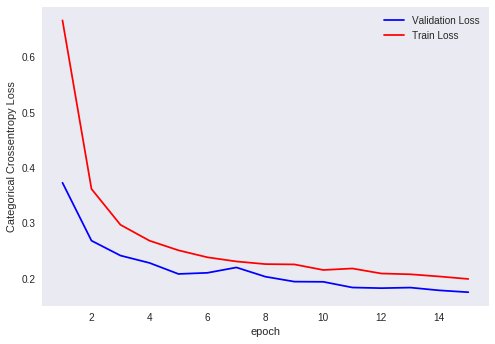

In [4]:
#2Layer(364,52 Layer Model)

def plt_dynamic(x, vy, ty, ax):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

model_2layer = Sequential()
L2_droprate = 0.2
L2_reg = 0.001
model_2layer.add(Dense(364, kernel_regularizer=regularizers.l2(L2_reg),input_shape=(input_dim,),kernel_initializer = initializer,activation='relu'))
model_2layer.add(Dropout(L2_droprate))
model_2layer.add(Dense(52, kernel_regularizer=regularizers.l2(L2_reg),activation='relu'))
model_2layer.add(Dropout(L2_droprate))
model_2layer.add(Dense(output_dim, activation='softmax'))
#Compiling the model
model_2layer.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])
#Running the model on test data
history = model_2layer.fit(X_train, Y_train,epochs =nb_epoch,batch_size =128,validation_data = (X_test,Y_test))
#Plotting the train vs test Categorical Crossentropy loss
#Code Reference - Applied AI course
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
L2_trainloss =ty[14]
L2_valloss=vy[14]

plt_dynamic(x, vy, ty, ax)

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 14s 236us/step - loss: 2.6865 - acc: 0.9029 - val_loss: 0.6174 - val_acc: 0.9427
Epoch 2/15
60000/60000 [==============================] - 13s 219us/step - loss: 0.5703 - acc: 0.9323 - val_loss: 0.4889 - val_acc: 0.9424
Epoch 3/15
60000/60000 [==============================] - 13s 219us/step - loss: 0.5227 - acc: 0.9313 - val_loss: 0.4453 - val_acc: 0.9485
Epoch 4/15
60000/60000 [==============================] - 13s 219us/step - loss: 0.4813 - acc: 0.9355 - val_loss: 0.4475 - val_acc: 0.9379
Epoch 5/15
60000/60000 [==============================] - 13s 218us/step - loss: 0.4737 - acc: 0.9341 - val_loss: 0.4378 - val_acc: 0.9428
Epoch 6/15
60000/60000 [==============================] - 13s 219us/step - loss: 0.4544 - acc: 0.9357 - val_loss: 0.3980 - val_acc: 0.9492
Epoch 7/15
60000/60000 [==============================] - 13s 219us/step - loss: 0.4403 - acc: 0.9372 - val_loss: 0.

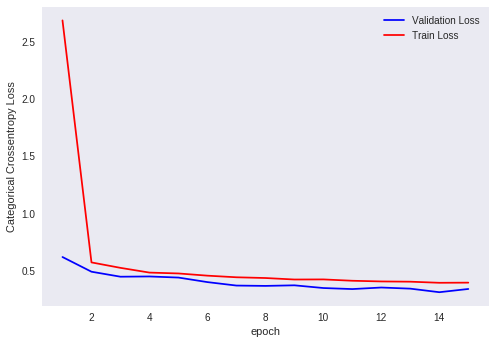

In [5]:
#3Layer(576,364,52 Layer Model)
from keras.layers.normalization import BatchNormalization
L3_droprate = 0.2
L3_reg = 0.01
model_3layer = Sequential()
model_3layer.add(Dense(576, kernel_regularizer=regularizers.l2(L3_reg),kernel_initializer = initializer,input_shape=(input_dim,),activation='relu'))
model_3layer.add(Dropout(L3_droprate))
model_3layer.add(BatchNormalization())
model_3layer.add(Dense(364, kernel_regularizer=regularizers.l2(L3_reg),activation='relu'))
model_3layer.add(Dropout(L3_droprate))
model_3layer.add(BatchNormalization())
model_3layer.add(Dense(52, kernel_regularizer=regularizers.l2(L3_reg),activation='relu'))
model_3layer.add(Dropout(L3_droprate))
model_3layer.add(Dense(output_dim, activation='softmax'))
#Compiling the model
model_3layer.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])
#Running the model on test data
history = model_3layer.fit(X_train, Y_train,epochs =nb_epoch,batch_size =128,validation_data = (X_test,Y_test))
#Plotting the train vs test Categorical Crossentropy loss
#Code Reference - Applied AI course
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
L3_trainloss =ty[14]
L3_valloss=vy[14]
plt_dynamic(x, vy, ty, ax)

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 20s 341us/step - loss: 5.2947 - acc: 0.8500 - val_loss: 0.8876 - val_acc: 0.9281
Epoch 2/15
60000/60000 [==============================] - 19s 316us/step - loss: 0.8091 - acc: 0.9121 - val_loss: 0.6565 - val_acc: 0.9409
Epoch 3/15
60000/60000 [==============================] - 19s 316us/step - loss: 0.7449 - acc: 0.9150 - val_loss: 0.6486 - val_acc: 0.9381
Epoch 4/15
60000/60000 [==============================] - 19s 316us/step - loss: 0.7193 - acc: 0.9172 - val_loss: 0.6019 - val_acc: 0.9422
Epoch 5/15
60000/60000 [==============================] - 19s 317us/step - loss: 0.6970 - acc: 0.9185 - val_loss: 0.5654 - val_acc: 0.9511
Epoch 6/15
60000/60000 [==============================] - 19s 317us/step - loss: 0.6829 - acc: 0.9180 - val_loss: 0.5655 - val_acc: 0.9487
Epoch 7/15
60000/60000 [==============================] - 19s 317us/step - loss: 0.6662 - acc: 0.9192 - val_loss: 0.

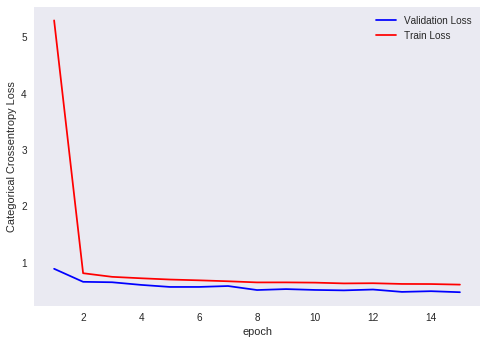

In [6]:
#5Layer(512,448,384,320,256 Layer Model)
model_5layer = Sequential()
L5_droprate = 0.3
L5_reg = 0.01
model_5layer.add(Dense(512, kernel_regularizer=regularizers.l2(L5_reg),kernel_initializer = initializer, input_shape=(input_dim,),activation='relu'))
model_5layer.add(Dropout(L5_droprate))
model_5layer.add(Dense(448, kernel_regularizer=regularizers.l2(L5_reg),activation='relu'))
model_5layer.add(Dropout(L5_droprate))
model_5layer.add(BatchNormalization())
model_5layer.add(Dense(384, kernel_regularizer=regularizers.l2(L5_reg),activation='relu'))
model_5layer.add(Dropout(L5_droprate ))
model_5layer.add(BatchNormalization())
model_5layer.add(Dense(320, kernel_regularizer=regularizers.l2(L5_reg),activation='relu'))
model_5layer.add(Dropout(L5_droprate))
model_5layer.add(BatchNormalization())
model_5layer.add(Dense(256, kernel_regularizer=regularizers.l2(L5_reg),activation='relu'))
model_5layer.add(Dropout(L5_droprate))
model_5layer.add(Dense(output_dim, activation='softmax'))
#Compiling the model
model_5layer.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])
#Running the model on test data
history = model_5layer.fit(X_train, Y_train,epochs =nb_epoch,batch_size =128,validation_data = (X_test,Y_test))
#Plotting the train vs test Categorical Crossentropy loss
#Code Reference - Applied AI course
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
L5_trainloss =ty[14]
L5_valloss=vy[14]
plt_dynamic(x, vy, ty, ax)

In [7]:
from prettytable import PrettyTable
cm = PrettyTable()
cm.field_names = ["No. of Layers",'Dropout Rate',"Regularization", "TrainLoss at 15th Epoch", "ValLoss at 15th Epoch"]
cm.add_row(["2", L2_droprate,L2_reg,round(L2_trainloss,3),round(L2_valloss,3)])
cm.add_row(["3", L3_droprate,L3_reg,round(L3_trainloss,3),round(L3_valloss,3)])
cm.add_row(["5", L5_droprate,L5_reg,round(L5_trainloss,3),round(L5_valloss,3)])
print(cm)

+---------------+--------------+----------------+-------------------------+-----------------------+
| No. of Layers | Dropout Rate | Regularization | TrainLoss at 15th Epoch | ValLoss at 15th Epoch |
+---------------+--------------+----------------+-------------------------+-----------------------+
|       2       |     0.2      |     0.001      |          0.199          |         0.175         |
|       3       |     0.2      |      0.01      |          0.393          |         0.338         |
|       5       |     0.3      |      0.01      |          0.607          |         0.472         |
+---------------+--------------+----------------+-------------------------+-----------------------+
